# Table of Contents

- [Metadata](#metadata)
- [Deep Dive](#deep-dive)
   - [Step 1: Required Libraries & Data Loading](#step-1-required-libraries--data-loading)
   - [Step 2: Data Cleaning & Preparation](#step-2-data-cleaning--preparation)
     - [Initial Data Exploration](#initial-data-exploration)
     - [Duplicate Data Detection](#duplicate-data-detection)
     - [Handling Missing Data](#handling-missing-data)
   - [Inserting Processed Data into Database](#inserting-processed-data-into-database)
     - [Creating the Database](#creating-the-database)
     - [Connecting to PostgresQL](#connecting-to-postgresql)
     - [Creating the Table](#creating-the-table)
     - [Inserting Data into the Table](#inserting-data-into-the-table)

# Metadata

**Customer Status**

- *CustomerID* - unique customer identification number
- *Churn Label* - indicates if the customer churned
- *Churn Category* - classes of churns
- *Churn Reason* - the reason for the churn of the customer

**Demographic**

- *Under30* - indicates if the customer is under 30 years old
- *Senior* - indicates if the customer is a senior
- *Gender* - the gender of the customer
- *Age* - the age of the customer

**Contract Information**

- *Contract Type* - the subscription basis of the customer
- *Payment Method* - means of payment
- *Phone Number* - the phone number of the customer
- *Group* - indicates if the customer is part of a group plan
- *Number of Customers in a Group* - number of customers part of group

**Subscription Types & Charges**

- *Account Length (in months)* – the duration of the customer's tenure
- *Local Calls* - the number of local calls made
- *Local mins* - time spent on local calls made
- *Int Calls* - the number of international calls made
- *Intl mins* - time spent on local calls made
- *Intl Plan* – Indicates whether the customer has a premium plan for free international calls
- *Intl Active* – Indicates whether the customer makes international calls
- *Extra International Charges* - charges incurred on internatoinal calls for customers who are not on a premium plan
- *Customer Service Calls* - the number of calls made to customer service
- *Avg Monthly Download* - contains the average monthly download volume in gigabytes
- *Unlimited Data Plan* - if the customer subscribed for unlimited data
- *Monthly Charges* - charges incurred on each customer on a monthly basis
- *Total Charges* - total charges incurred on each customer

# Deep Dive

## Step 1: Required Libraries & Data Loading

In [74]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, HTML
import plotly.express as px

#import cufflinks as cf
#import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [75]:
import os
import zipfile

# Getting the absolute path of the project directory
project_path = os.path.abspath(os.path.join(base_path, ".."))  # Go one level up
data_folder = os.path.join(project_path, "data")  # Store data inside 'data' in the main project

# Ensuring the correct 'data' folder exists
os.makedirs(data_folder, exist_ok=True)

# Updating paths for ZIP and CSV files
zip_file_path = os.path.join(data_folder, "databel-telecom-customer-churn-dataset.zip")
csv_file_path = os.path.join(data_folder, "Databel - Data.csv")

# Removing the "Downloads" folder if it exists
downloads_path = os.path.join(project_path, "Downloads")
if os.path.exists(downloads_path):
    import shutil
    shutil.rmtree(downloads_path)

# Ensuring the data folder exists
os.makedirs("../data", exist_ok=True)

# Checking if the dataset is already extracted
if not os.path.exists(csv_file_path):
    print("Dataset not found locally. Downloading and extracting...")

    # Downloading the dataset using Kaggle API
    !kaggle datasets download -d yichienchong/databel-telecom-customer-churn-dataset -p data/

    # Extracting the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(data_folder)

# Loading CSV into a DataFrame
df_initial = pd.read_csv(csv_file_path)

## Step 2: Data Cleaning & Preparation

- Verify the data types for consistency and address any discrepancies.
  
- Identify and handle duplicate records.

- Evaluate missing values and take appropriate action (remove or impute).

- Address missing data by either removing or imputing values, depending on the context.

- Outlier detection and treatment will be thoroughly explored during the Exploratory Data Analysis (EDA) phase (Step 3).

### Initial Data Exploration

In [3]:
df_initial.head(5)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [4]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [5]:
df_initial.shape

(6687, 29)

In [6]:
df_initial.columns

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [7]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

### Duplicate Data Detection

In [8]:
df_initial.duplicated().sum()

0

We have no duplicate entries in this dataset.

### Handling Missing Data

In [9]:
df_initial.isnull().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

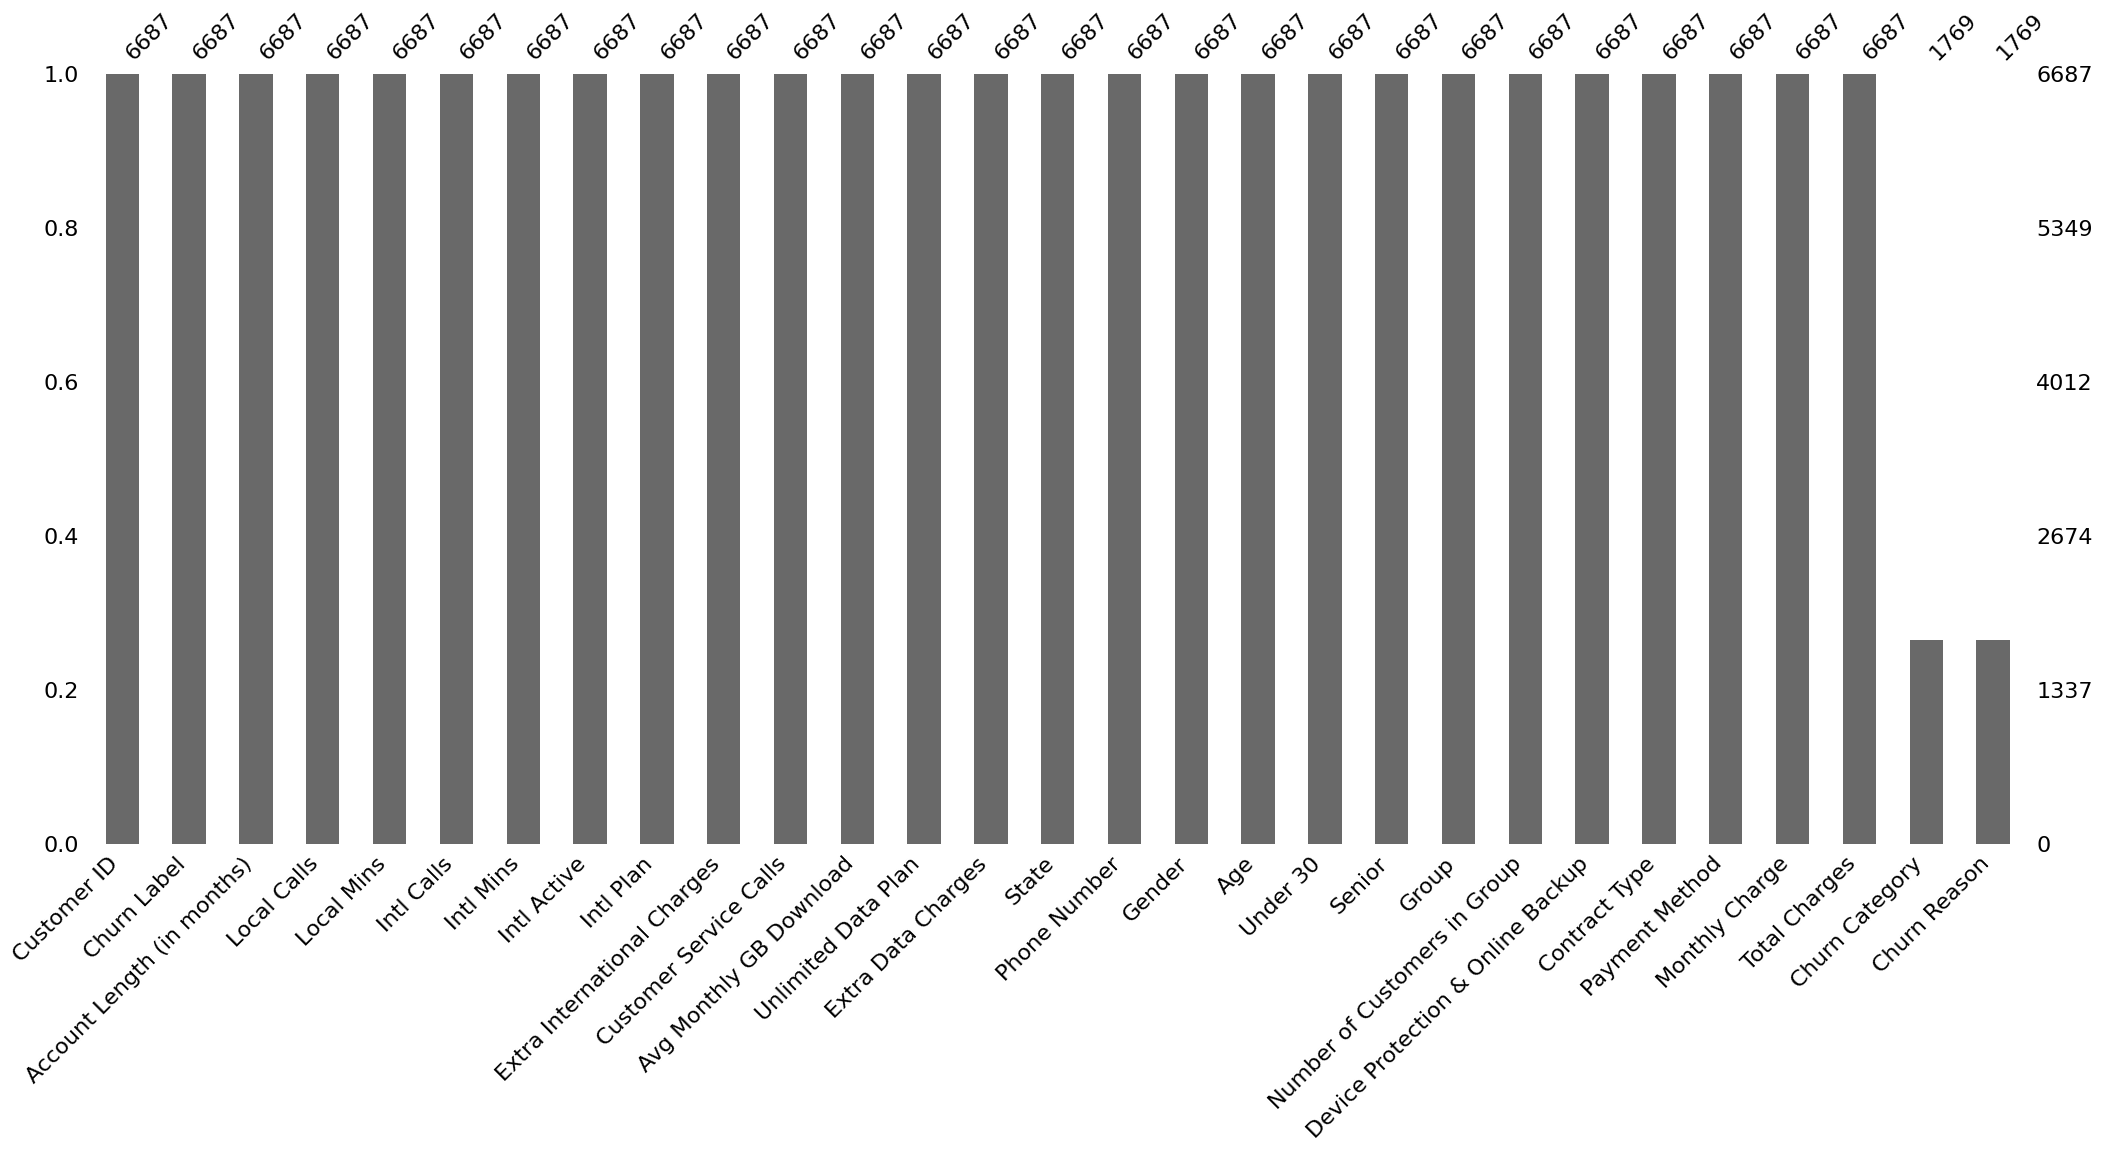

In [10]:
import missingno as msno

msno.bar(df_initial)
plt.show()

Churn Category and Churn Reason have a significant number of missing values (each has 4918 missing records). Since these columns are tied to churn, we can check if these entries are associated with customers who didn't churn. First, let's explore categories in these two columns.

In [11]:
df_initial["Churn Category"].unique()

array([nan, 'Competitor', 'Other', 'Attitude', 'Dissatisfaction', 'Price'],
      dtype=object)

In [12]:
df_initial["Churn Reason"].unique()

array([nan, 'Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Attitude of support person', 'Network reliability', "Don't know",
       'Service dissatisfaction', 'Product dissatisfaction',
       'Poor expertise of online support', 'Price too high',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Competitor offered more data',
       'Attitude of service provider', 'Poor expertise of phone support',
       'Extra data charges', 'Deceased',
       'Lack of self-service on Website'], dtype=object)

Let's check if these entries are associated with customers who didn't churn. 

In [13]:
# Count of missing values in 'Churn Category' and 'Churn Reason'
missing_churn_category = df_initial["Churn Category"].isna().sum()
missing_churn_reason = df_initial["Churn Reason"].isna().sum()

# Count of non-churned customers (Churn Label = "No")
non_churned_customers = len(df_initial[df_initial["Churn Label"] == "No"])

# Results
print(f"Missing records in churn category: {missing_churn_category}")
print(f"Missing records in churn reason: {missing_churn_reason}")
print(f"Non-churned customers: {non_churned_customers}")

Missing records in churn category: 4918
Missing records in churn reason: 4918
Non-churned customers: 4891


These numbers could imply that the null values in the "Churn Category" and "Churn Reason" columns are likely due to the customers not being in a churned state and therefore not having a relevant churn category/Reason.

To handle the null values properly,
we fill in the null values in the "Churn Category" column for non-churned customers ("No" churn label) with "Not Churned_C".
We also fill in the null values in the "Churn Reason" column for non-churned customers ("No" churn label) with "Not Churned_R".

In [14]:
df_initial.loc[df_initial["Churn Label"] == "No", "Churn Category"] = "Not Churned_C"
df_initial.loc[df_initial["Churn Label"] == "No", "Churn Reason"] = "Not Churned_R"

In [15]:
df_initial["Churn Category"].isnull().sum()

27

In [16]:
df_initial["Churn Reason"].isnull().sum()

27

**At this point, we have to options:**
- *Option1*-
For the churned customers (where "Churn Label" is "Yes"), we can fill the null values in "Churn Category" column with a specific category named "Unknown category".Also, for churners, we can fill the null values in "Churn Reason" column with a specific category named "Unknown Reason".e.g., df_initial["Churn Category"].fillna("Unknown Category", inplace=True)

- *Option2*-
Since there are only 27 missing records, we can simply drop the null values. 

Option 2 makes more sense here. 

In [17]:
# Dropping rows with NaN in 'Churn Category' and 'Churn Reason' and updating the DataFrame
df_initial = df_initial.dropna(subset=["Churn Category", "Churn Reason"])

In [18]:
# Final check for missing values
df_initial.isnull().sum()

Customer ID                          0
Churn Label                          0
Account Length (in months)           0
Local Calls                          0
Local Mins                           0
Intl Calls                           0
Intl Mins                            0
Intl Active                          0
Intl Plan                            0
Extra International Charges          0
Customer Service Calls               0
Avg Monthly GB Download              0
Unlimited Data Plan                  0
Extra Data Charges                   0
State                                0
Phone Number                         0
Gender                               0
Age                                  0
Under 30                             0
Senior                               0
Group                                0
Number of Customers in Group         0
Device Protection & Online Backup    0
Contract Type                        0
Payment Method                       0
Monthly Charge           

## Inserting Processed Data into Database

### Creating the Database

In [19]:
import psycopg2
import config  # Importing the configuration file for database credentials

# Step 1: Connecting to the default PostgreSQL database to create the new database
conn = psycopg2.connect(
    dbname="postgres",  # Default database to connect to
    user=config.DB_USER,
    password=config.DB_PASSWORD,
    host=config.DB_HOST,
    port=config.DB_PORT
)
conn.autocommit = True  # Enabling autocommit so changes are applied automatically
cursor = conn.cursor()

# Step 2: Creating the 'customer_churn_database' if it does not exist
cursor.execute("SELECT 1 FROM pg_catalog.pg_database WHERE datname = %s", ('customer_churn_database',))
exists = cursor.fetchone()
if not exists:
    cursor.execute('CREATE DATABASE customer_churn_database;')
    print("Database 'customer_churn_database' created successfully.")
else:
    print("Database 'customer_churn_database' already exists.")

conn.close()  # Closing the initial connection to 'postgres'

Database 'customer_churn_database' already exists.


### Connecting to PostgreSQL

In [20]:
# Step 1: Connecting to the 'customer_churn_database' using credentials from config.py
conn = psycopg2.connect(
    dbname=config.DB_NAME,
    user=config.DB_USER,
    password=config.DB_PASSWORD,
    host=config.DB_HOST,
    port=config.DB_PORT
)
conn.autocommit = True  # Enabling autocommit so changes are applied automatically
cursor = conn.cursor()

### Creating the Table

In [21]:
# Step 2: Creating the table if it does not exist
create_table_query = """CREATE TABLE IF NOT EXISTS customer_churn_table (
    "Customer ID" VARCHAR(255),
    "Churn Label" VARCHAR(255),
    "Account Length (in months)" INTEGER,
    "Local Calls" INTEGER,
    "Local Mins" FLOAT,
    "Intl Calls" FLOAT,
    "Intl Mins" FLOAT,
    "Intl Active" VARCHAR(255),
    "Intl Plan" VARCHAR(255),
    "Extra International Charges" FLOAT,
    "Customer Service Calls" INTEGER,
    "Avg Monthly GB Download" INTEGER,
    "Unlimited Data Plan" VARCHAR(255),
    "Extra Data Charges" INTEGER,
    "State" VARCHAR(255),
    "Phone Number" VARCHAR(255),
    "Gender" VARCHAR(255),
    "Age" INTEGER,
    "Under 30" VARCHAR(255),
    "Senior" VARCHAR(255),
    "Group" VARCHAR(255),
    "Number of Customers in Group" INTEGER,
    "Device Protection & Online Backup" VARCHAR(255),
    "Contract Type" VARCHAR(255),
    "Payment Method" VARCHAR(255),
    "Monthly Charge" INTEGER,
    "Total Charges" INTEGER,
    "Churn Category" VARCHAR(255),
    "Churn Reason" VARCHAR(255),
    "Churned" INTEGER
);"""

# Dropping the existing data in the table 
# cursor.execute("DROP TABLE IF EXISTS customer_churn_table;") # Executing Table Creation
cursor.execute(create_table_query)
conn.commit()

# Dropping the existing data in the table
cursor.execute("DELETE FROM customer_churn_table;")
conn.commit()

### Inserting Data into the Table

In [22]:
# Step 4: Inserting the processed DataFrame into the table
for _, row in df_initial.iterrows():
    values = tuple(row)  # Converting row to a tuple
    placeholders = ", ".join(["%s"] * len(row))
    insert_query = f"INSERT INTO customer_churn_table VALUES ({placeholders})"
    cursor.execute(insert_query, values)

conn.commit()  # Committing changes to the database
print("Processed data has been written to the database.")

Processed data has been written to the database.


**The dataset is ready for analysis.**